In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
df = pd.read_csv('wine_dataset.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (20, 14)

First 5 rows:
   class  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   color_intensity   hue  od280_od315_of_diluted_wines  proline  
0             5.64  1.04                          3.9

In [3]:
print("Feature names:", df.columns.tolist())
print(f"Number of features: {len(df.columns) - 1}")
print("\nClass distribution:")
print(df['class'].value_counts().sort_index())

Feature names: ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280_od315_of_diluted_wines', 'proline']
Number of features: 13

Class distribution:
class
1    8
2    7
3    5
Name: count, dtype: int64


In [4]:
X = df.drop('class', axis=1)
y = df['class']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("\nFeature statistics:")
print(X.describe())

Feature matrix shape: (20, 13)
Target vector shape: (20,)

Feature statistics:
         alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count  20.000000   20.000000  20.000000          20.000000   20.000000   
mean   13.148500    1.836500   2.353500          17.905000  102.900000   
std     0.621342    0.667503   0.388821           3.523526   12.345466   
min    12.330000    0.940000   1.360000          10.600000   85.000000   
25%    12.685000    1.325000   2.155000          16.075000   94.000000   
50%    13.105000    1.745000   2.340000          17.750000  100.500000   
75%    13.460000    2.115000   2.530000          19.550000  108.500000   
max    14.370000    3.550000   3.220000          25.000000  127.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count      20.000000   20.000000             20.000000        20.000000   
mean        2.384500    2.082500              0.331000         1.379000   
std         0.696551    0.955

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original feature means:", X.mean().values)
print("Scaled feature means:", X_scaled.mean(axis=0))
print("Scaled feature std:", X_scaled.std(axis=0))

Original feature means: [1.31485e+01 1.83650e+00 2.35350e+00 1.79050e+01 1.02900e+02 2.38450e+00
 2.08250e+00 3.31000e-01 1.37900e+00 4.70650e+00 9.90000e-01 2.51650e+00
 8.22250e+02]
Scaled feature means: [ 2.34257058e-15  2.76167977e-16  1.36279876e-15  7.16093851e-16
 -4.44089210e-16 -1.47104551e-16  4.71844785e-16 -1.33226763e-16
 -2.77555756e-17 -9.65373614e-17  9.15933995e-17  3.33066907e-16
  1.11022302e-17]
Scaled feature std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA transformed data shape:", X_pca.shape)
print("\nPrincipal Components (Eigenvectors):")
print(pca.components_)
print("\nExplained Variance (Eigenvalues):")
print(pca.explained_variance_)
print("\nExplained Variance Ratios:")
print(pca.explained_variance_ratio_)

PCA transformed data shape: (20, 2)

Principal Components (Eigenvectors):
[[ 0.34621008  0.08412382  0.25697384  0.03097392  0.19031168  0.35155924
   0.40838054 -0.10028573  0.38721076  0.19079058  0.11893263  0.39058985
   0.34115081]
 [-0.00846996  0.48364903  0.33094729  0.45698955  0.27597271 -0.23912773
  -0.07194774 -0.10292256  0.03133008  0.28607907 -0.4105436  -0.20549864
  -0.07025126]]

Explained Variance (Eigenvalues):
[5.67412866 2.97942165]

Explained Variance Ratios:
[0.41464786 0.21772697]


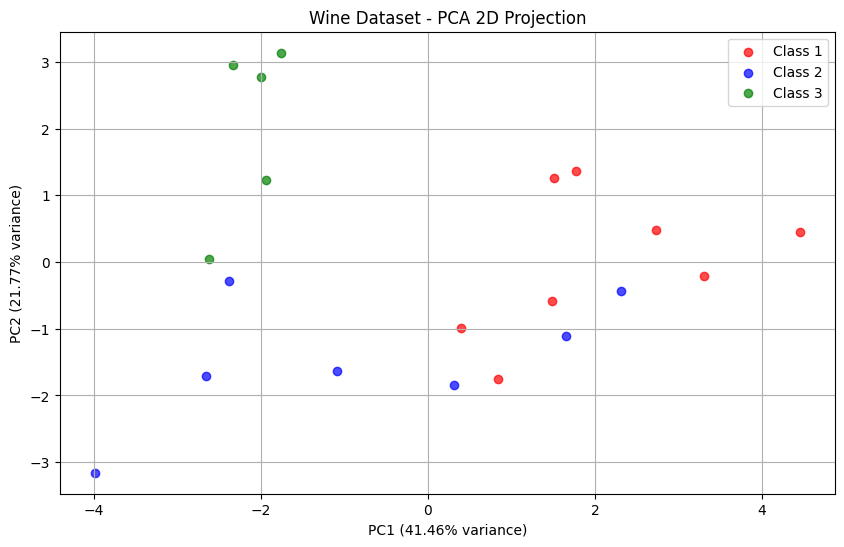

In [7]:
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green']
for i, wine_class in enumerate([1, 2, 3]):
    mask = y == wine_class
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=colors[i], label=f'Class {wine_class}', alpha=0.7)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Wine Dataset - PCA 2D Projection')
plt.legend()
plt.grid(True)
plt.show()

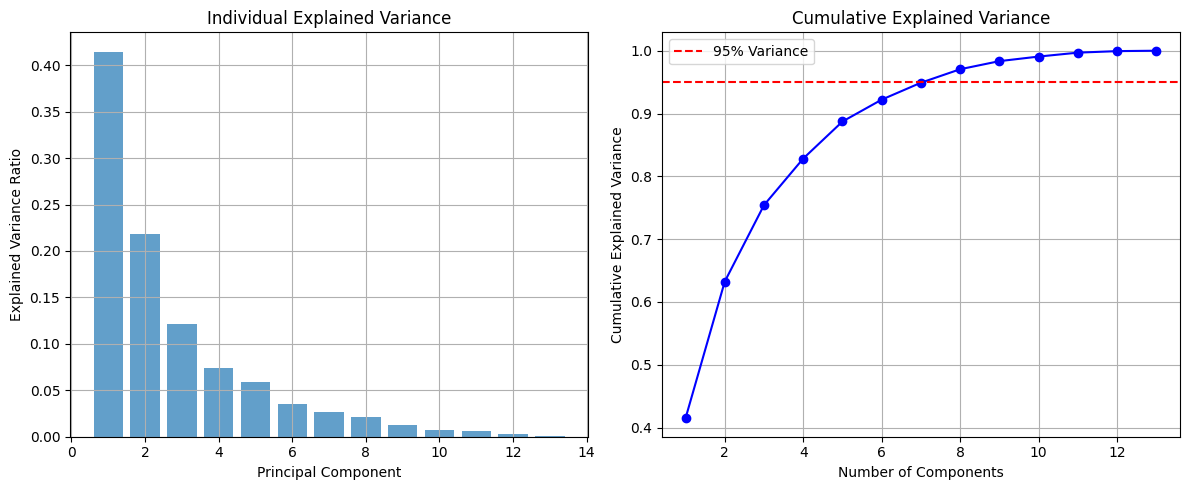

Components needed for 95% variance: 8
Variance explained by first 2 components: 63.24%


In [8]:
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
        pca_full.explained_variance_ratio_, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance')
plt.grid(True)

plt.subplot(1, 2, 2)
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

components_95 = np.argmax(cumsum_var >= 0.95) + 1
print(f"Components needed for 95% variance: {components_95}")
print(f"Variance explained by first 2 components: {sum(pca.explained_variance_ratio_):.2%}")

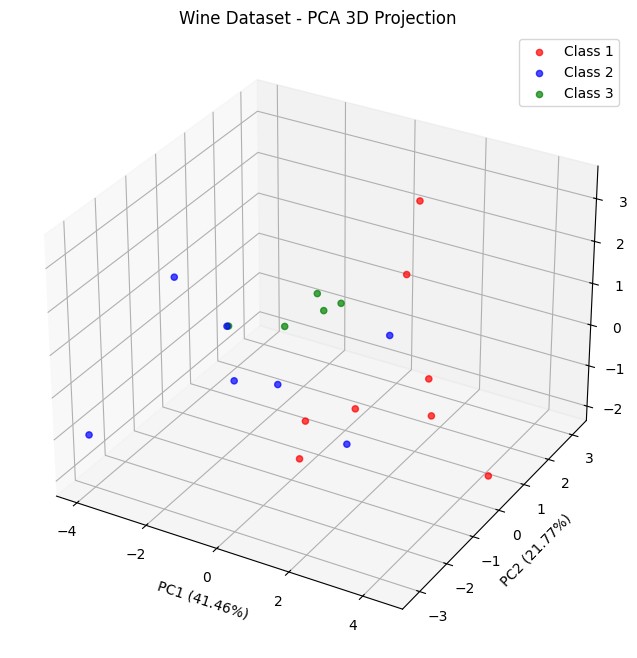

Variance explained by first 3 components: 75.41%


In [ ]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, wine_class in enumerate([1, 2, 3]):
    mask = y == wine_class
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
              c=colors[i], label=f'Class {wine_class}', alpha=0.7)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax.set_title('Wine Dataset - PCA 3D Projection')
ax.legend()
plt.show()

print(f"Variance explained by first 3 components: {sum(pca_3d.explained_variance_ratio_):.2%}")